# Student model with PGMPY

<p>Pgmpy is a pure python implementation for Bayesian Networks with a focus on modularity and extensibility [1].
This notebook is an implementation of the student bayesian network from the book "Probabilistic Graphical Model- principles and techniques" authored by Daphne Koller and Nir Friedman [2]. The purpose of this notebook is to provide a pgmpy implementation of the student network to aid in the process of learning with the aforementioned book.</p> 

## Description of the Student Model

### Description

The student model is a toy bayesian network used for introducing concepts of Continuous Probability Distributions (CPDs), marginal independence, conditional independence, causal reasoning or prediction, evidence reasoning or explanation  and intercausal reasoning or or explaining away. The tables given in the figure below are all CPDs.


<img src="student bayesian network.png" alt="fishy" class="bg-primary mb-1" width="600px">

Figure: Student Bayesian Network [Source: Probabilistic Graphical Models book [2] page:53]

### Creating the Bayesian network using pgmpy

In [1]:
from pgmpy.models import BayesianNetwork ## Make sure pgmpy is installed. If not installed,use "pip install pgmpy" in your command prompt

In [2]:
Student_Model=BayesianNetwork(([("Difficulty", "Grade"), ("Intelligence", "Grade"), ("Intelligence", "SAT"),("Grade","Letter")]))
# Note that to create a Bayesian network using pgmpy, we need to specify the list of edges in the network as a tuple

<Axes:>

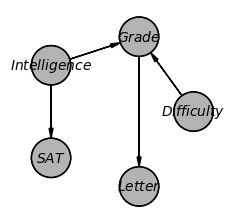

In [3]:
Student_Model.to_daft(node_pos='kamada_kawai').render()

### Adding CPDs to the student model

In [4]:
from pgmpy.factors.discrete import TabularCPD

In [5]:
CPD_Intelligence=TabularCPD(variable="Intelligence", variable_card=2, values=[[0.7],[0.3]], state_names={'Intelligence':['0','1'] })
print(CPD_Intelligence)

+-----------------+-----+
| Intelligence(0) | 0.7 |
+-----------------+-----+
| Intelligence(1) | 0.3 |
+-----------------+-----+


In [6]:
CPD_Difficulty=TabularCPD(variable="Difficulty", variable_card=2, values=[[0.6],[0.4]],state_names={'Difficulty':['0','1'] })
print(CPD_Difficulty)

+---------------+-----+
| Difficulty(0) | 0.6 |
+---------------+-----+
| Difficulty(1) | 0.4 |
+---------------+-----+


In [7]:
CPD_Grade=TabularCPD(variable="Grade", variable_card=3, values=[[0.3,0.05,0.9,0.5],[0.4,0.25,0.08,0.3],[0.3,0.7,0.02,0.2]], 
                     evidence=['Intelligence','Difficulty'], evidence_card=[2,2], state_names={'Grade':['1','2','3'],
                                                                                               'Intelligence':['0','1'],
                                                                                               'Difficulty':['0','1'] })
print(CPD_Grade)

+--------------+-----------------+-----------------+-----------------+-----------------+
| Intelligence | Intelligence(0) | Intelligence(0) | Intelligence(1) | Intelligence(1) |
+--------------+-----------------+-----------------+-----------------+-----------------+
| Difficulty   | Difficulty(0)   | Difficulty(1)   | Difficulty(0)   | Difficulty(1)   |
+--------------+-----------------+-----------------+-----------------+-----------------+
| Grade(1)     | 0.3             | 0.05            | 0.9             | 0.5             |
+--------------+-----------------+-----------------+-----------------+-----------------+
| Grade(2)     | 0.4             | 0.25            | 0.08            | 0.3             |
+--------------+-----------------+-----------------+-----------------+-----------------+
| Grade(3)     | 0.3             | 0.7             | 0.02            | 0.2             |
+--------------+-----------------+-----------------+-----------------+-----------------+


In [8]:
CPD_Letter=TabularCPD(variable="Letter", variable_card=2,values=[[0.1,0.4,0.99],[0.9,0.6,0.01]], evidence=['Grade'],evidence_card=[3],
                     state_names={'Letter': ['0','1'], 'Grade':['1','2','3'],'Intelligence':['0','1'],'Difficulty':['0','1'] })
print(CPD_Letter)

+-----------+----------+----------+----------+
| Grade     | Grade(1) | Grade(2) | Grade(3) |
+-----------+----------+----------+----------+
| Letter(0) | 0.1      | 0.4      | 0.99     |
+-----------+----------+----------+----------+
| Letter(1) | 0.9      | 0.6      | 0.01     |
+-----------+----------+----------+----------+


In [9]:
CPD_SAT=TabularCPD(variable="SAT",variable_card=2,values=[[0.95,0.2],[0.05,0.8]],evidence=["Intelligence"],evidence_card=[2],
                   state_names={'SAT':['0','1'],'Intelligence':['0','1']})
print(CPD_SAT)

+--------------+-----------------+-----------------+
| Intelligence | Intelligence(0) | Intelligence(1) |
+--------------+-----------------+-----------------+
| SAT(0)       | 0.95            | 0.2             |
+--------------+-----------------+-----------------+
| SAT(1)       | 0.05            | 0.8             |
+--------------+-----------------+-----------------+


In [10]:
Student_Model.add_cpds(CPD_Difficulty, CPD_Intelligence, CPD_Grade, CPD_Letter, CPD_SAT)
Student_Model.check_model()

True

In [11]:
# And with that we have defined and described the entire Student Model

## Reasoning Patterns

### Causal Reasoning or Prediction

In [12]:
# Consider a student George. We would like to ask a few things about George

1) Whats the probability that George gets a good recommendation letter


\begin{align}
P_{\mathcal{B}^{student}}(l^{1})
\end{align}


In [13]:
from pgmpy.inference import VariableElimination

In [14]:
inference_object = VariableElimination(Student_Model)

In [15]:
# Now we can query the inference object

In [16]:
print(inference_object.query(variables={"Letter":1}))

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.4977 |
+-----------+---------------+
| Letter(1) |        0.5023 |
+-----------+---------------+


2) Whats the probability that George gets a good recommendation letter given he is not so intelligent $ i^{0} $


\begin{align}
P_{\mathcal{B}^{student}}(\frac{l^{1}}{i^{0}})
\end{align}

In [17]:
print(inference_object.query(variables={"Letter":"1"},evidence={"Intelligence":"0"}))

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.6114 |
+-----------+---------------+
| Letter(1) |        0.3886 |
+-----------+---------------+


3) Whats the probability that George gets a good recommendation letter given he is not so intelligent $ i^{0} $ and the class is not so difficult $ d^{0} $

\begin{align}
P_{\mathcal{B}^{student}}(\frac{l^{1}}{i^{0},d^{0}})
\end{align}

In [18]:
print(inference_object.query(variables={"Letter":"1"},evidence={"Intelligence":"0", "Difficulty":"0"}))

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.4870 |
+-----------+---------------+
| Letter(1) |        0.5130 |
+-----------+---------------+


 ### Evidential Reasoning or explanation

1) Whats the probability that George has good intelligence given that he has got grade $ g^3 $

\begin{align}
P_{\mathcal{B}^{student}}(\frac{i^{1}}{g^{3}})
\end{align}

In [19]:
print(inference_object.query(variables={"Intelligence":"1"},evidence={"Grade":"3"}))

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.9211 |
+-----------------+---------------------+
| Intelligence(1) |              0.0789 |
+-----------------+---------------------+


2) Whats the probability that class has difficulty $ d^{1} $ given that he has got grade $ g^3 $

\begin{align}
P_{\mathcal{B}^{student}}(\frac{d^{1}}{g^{3}})
\end{align}

In [20]:
print(inference_object.query(variables={"Difficulty":"1"},evidence={"Grade":"3"}))

+---------------+-------------------+
| Difficulty    |   phi(Difficulty) |
+===============+===================+
| Difficulty(0) |            0.3707 |
+---------------+-------------------+
| Difficulty(1) |            0.6293 |
+---------------+-------------------+


3) Whats the probability that class has Intelligence $ i^{1} $ given that he has got letter $ l^0 $

\begin{align}
P_{\mathcal{B}^{student}}(\frac{i^{1}}{l^{0}})
\end{align}

In [21]:
print(inference_object.query(variables={"Intelligence":"1"},evidence={"Letter":"0"}))

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.8600 |
+-----------------+---------------------+
| Intelligence(1) |              0.1400 |
+-----------------+---------------------+


4) Whats the probability that class has Intelligence $ i^{1} $ given that he has got letter $ l^0 $ and the grade $ g^{3} $

\begin{align}
P_{\mathcal{B}^{student}}(\frac{i^{1}}{l^{0},g^{3}})
\end{align}

In [22]:
print(inference_object.query(variables={"Intelligence":"1"},evidence={"Letter":"0", "Grade":"3"}))

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.9211 |
+-----------------+---------------------+
| Intelligence(1) |              0.0789 |
+-----------------+---------------------+


### Intercausal Reasoning or explaining away

1) Whats the probability that class has Intelligence $ i^{1} $ given that he has the grade $ g^{3} $ and got a high SAT score $ s^{1} $

\begin{align}
P_{\mathcal{B}^{student}}(\frac{i^{1}}{s^{1},g^{3}})
\end{align}

In [23]:
print(inference_object.query(variables={"Intelligence":"1"},evidence={"SAT":"1", "Grade":"3"}))

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.4217 |
+-----------------+---------------------+
| Intelligence(1) |              0.5783 |
+-----------------+---------------------+


2) Whats the probability that class has Difficulty $ d^{1} $ given that he has the grade $ g^{3} $ and got a high SAT score $ s^{1} $

\begin{align}
P_{\mathcal{B}^{student}}(\frac{d^{1}}{s^{1},g^{3}})
\end{align}

In [24]:
print(inference_object.query(variables={"Difficulty":"1"},evidence={"SAT":"1", "Grade":"3"}))

+---------------+-------------------+
| Difficulty    |   phi(Difficulty) |
+===============+===================+
| Difficulty(0) |            0.2404 |
+---------------+-------------------+
| Difficulty(1) |            0.7596 |
+---------------+-------------------+


3) Whats the probability that George has Intelligence $ i^{1} $ given that he has the grade $ g^{3} $ and the class is difficult $ d^{1} $

\begin{align}
P_{\mathcal{B}^{student}}(\frac{i^{1}}{d^{1},g^{3}})
\end{align}

In [28]:
print(inference_object.query(variables={"Intelligence":"1"},evidence={"Difficulty":"1", "Grade":"3"}))

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.8909 |
+-----------------+---------------------+
| Intelligence(1) |              0.1091 |
+-----------------+---------------------+


3) Whats the probability that George has Intelligence $ i^{1} $ given that he has the grade $ g^{2} $ and the class is difficult $ d^{1} $

\begin{align}
P_{\mathcal{B}^{student}}(\frac{i^{1}}{d^{1},g^{2}})
\end{align}

In [29]:
print(inference_object.query(variables={"Intelligence":"1"},evidence={"Difficulty":"1", "Grade":"2"}))

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.6604 |
+-----------------+---------------------+
| Intelligence(1) |              0.3396 |
+-----------------+---------------------+


# References

[1] Python library for Probabilistic Graphical Models pgmpy "https://pgmpy.org/"

[2] Daphne Koller, Nir Friedman "Probabilistic Graphical Models -Principles and Techniques" MIT Press ISBN 978-0-262-01319-2